<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/16May20_2_choosing_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choosing Hyperparameters

### Introduction

In the last lesson, we saw we could correct for overfitting in our decision tree by limiting the number of levels in our decision tree.  With fewer levels, we had fewer leaf nodes, and thus more samples in each decision tree.  This restrained our decision tree from fitting to the randomness in the data and thus reducing the variance in our model.

Unfortunately, as we'll see it, it introduced bias into our model.

### The bias variance tradeoff

Remember that when working with models we have three kinds of error.  

* Irreducible error: This is error from randomness in future data
* Variance: This is due to our model being influenced by the randomness in our training set
* Bias: Here our model does not have the flexibility to discover the true influences of the model.

With our decision tree, we started with a model that had a lot of variance.  As it fit to each individual observation.

![](https://github.com/jigsawlabs-student/Random-Forests/blob/master/d-tree.png?raw=1)

But then by limiting the number of levels, we had a tree that had bias.

<img src="https://github.com/jigsawlabs-student/Random-Forests/blob/master/constrained-levels.png?raw=1" width="60%">

So while our second tree performed better, notice that it can only make predictions four predictions for each observation.  This appears to be too constrained for our model to find all of the factors that change outcomes in our observations.

What we are witnessing above is called the *bias-variance tradeoff*.  Too constrained a model and we have bias, and too flexible a model and our model fits to the randomness in the data and we have variance.

### Tuning our hyperparameter

Our goal as data scientists is to find the value of the hyperparameter where we don't have too much of either kind of error.  How do we do that?  Well we try different values, see the accuracy score on the holdout set, and choose the value that produces the highest accuracy.

Ok, let's do it.

We can start by loading up and splitting our data.

In [0]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
dataset = load_diabetes()
X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

Then we can train trees with levels constrained from 1 to 50, and find which model performs the best.

In [0]:
from sklearn.tree import DecisionTreeRegressor
max_levels = list(range(1, 50))
levels = []
scores = []
for level in max_levels:
    model = DecisionTreeRegressor(max_depth = level)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    levels.append(level)
    scores.append(score)

Ok, let's graph our different models and their related scores.

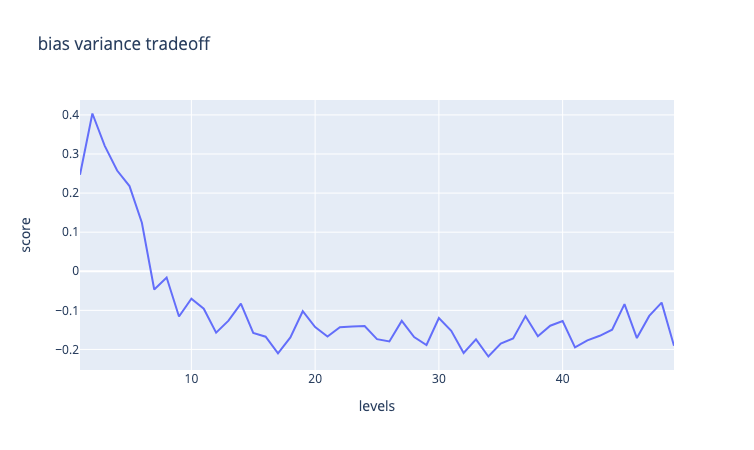

In [0]:
import plotly.graph_objects as go
scatter = go.Scatter(x = levels, y = scores)
layout = go.Layout(title = 'bias variance tradeoff', xaxis=dict(title = 'levels'), yaxis=dict(title = 'score'))
go.Figure(data = [scatter], layout = layout)

This typical of the type of graph we might see in tuning a hyperparameter.  Starting from the left of our graph, we see that our model initially improves as we add more levels from 1 to to 2.  This is because we are allowing our model to becoming more complex, and thus more responsive to our data.  

But eventually our model becomes too variant, and performance suffers.  That is, the model's responsiveness to the randomness in the data outweighs the benefits of flexibility.  In our chart above, we see that our best performing hyperparameter is at `max_levels = 2`.

So that's what we can choose as our hyperparameter.

In [0]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 2)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.40359839634724004

### Summary

In this lesson, we saw that we are able to balance the bias variance tradeoff by tuning our hyperparameter.  We tune our hyperparameter by iteratively modeling different versions of our decision tree and choosing model that scores highest on the data in the test set. 